<a href="https://colab.research.google.com/github/Orliluq/NewsWatcher/blob/main/NewsTmeBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NewsWatcher**

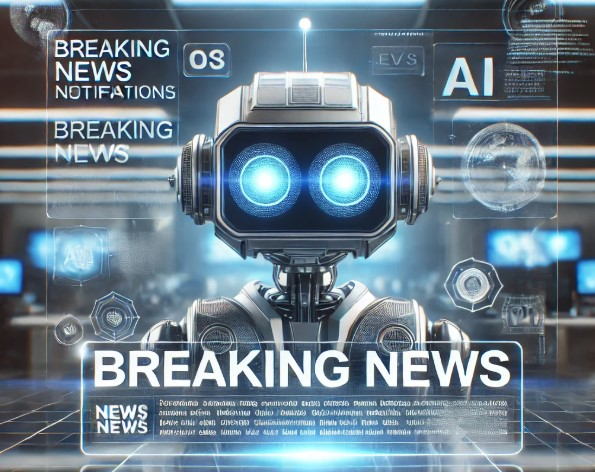

## 📌 Pasos para Configurar el Proyecto
- **Instalar Dependencias**


In [1]:
!pip install selenium beautifulsoup4 python-telegram-bot --upgrade
!apt-get update && apt-get install -y chromium-chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 29.0 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,318 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-dr

- **Importar Librerías y Configurar el Navegador**

In [3]:
!which chromedriver

/usr/bin/chromedriver


In [8]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import shutil

# Configurar opciones de Chrome
chrome_options = Options()
chrome_options.add_argument("--headless=new")  # Modo sin interfaz gráfica. New Headless Mode.
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Definir la ruta del chromedriver correctamente - Optional
# service = Service(executable_path=shutil.which("/usr/bin/chromedriver"))  # Detectar ruta automáticamente

# Use Selenium Manager
driver = webdriver.Chrome(options=chrome_options)

# Probar que Selenium funciona
driver.get("https://www.google.com")
print("Selenium configurado correctamente 🚀")
driver.quit()

Selenium configurado correctamente 🚀


## 🔎 **Scraping de Noticias**

In [22]:
# Initialize driver as global variable to prevent connection reset
driver = None

def initialize_driver():
    """Initializes the Chrome driver."""
    global driver
    if driver is None:
      # Use Selenium Manager to handle the chromedriver path
      driver = webdriver.Chrome(options=chrome_options)

def scrape_news():
    """Scrapes the top 5 headlines from Hacker News."""
    global driver
    # Initialize the driver
    initialize_driver()
    url = "https://news.ycombinator.com/"
    driver.get(url)
    time.sleep(2)  # Wait for the page to load
    soup = BeautifulSoup(driver.page_source, "html.parser")
    headlines = [a.text for a in soup.select('.titleline a')][:5]  # Extract the top 5 headlines
    return headlines

## 📩 **Enviar Noticias a Telegram**

[How to get Telegram Bot Chat ID](https://gist.github.com/nafiesl/4ad622f344cd1dc3bb1ecbe468ff9f8a)

## 1️⃣ **Crear archivo .env**


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Install the necessary packages
!pip install python-dotenv python-telegram-bot

# Import the libraries
from dotenv import load_dotenv
from telegram import Bot
import os
from google.colab import drive

# Cargar variables desde Google Drive
load_dotenv("/content/drive/MyDrive/config.env")

# Obtener las variables
TELEGRAM_BOT_TOKEN = os.getenv("TELEGRAM_BOT_TOKEN")
CHAT_ID = os.getenv("CHAT_ID")

print("Credenciales cargadas correctamente 🚀")

bot = Bot(token=TELEGRAM_BOT_TOKEN)

def send_to_telegram(headlines):
    """Sends the headlines to a Telegram chat."""
    for title in headlines:
        bot.send_message(chat_id=CHAT_ID, text=f"📰 {title}")
        time.sleep(1)  # Avoids spamming Telegram

# Run the news scraper and send the results
try:
  news = scrape_news()
  send_to_telegram(news)
except Exception as e:
  print(f"An error occurred: {e}")
finally:
  # Always close the driver, even if an error occurs
  if driver is not None:
    driver.quit()
    driver = None

Credenciales cargadas correctamente 🚀


<ipython-input-23-8b8af56b4ece>:24: RuntimeWarning: coroutine 'Bot.send_message' was never awaited
  bot.send_message(chat_id=CHAT_ID, text=f"📰 {title}")


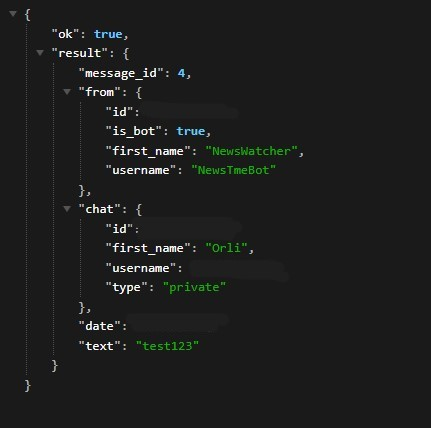

## 🚀 **Próximos Pasos**

- Mejorar Scraping: Extrae descripciones y enlaces.
- Usar Google Drive: Guarda un historial de noticias enviadas.